<a href="https://colab.research.google.com/github/dsnasn/dsnasn/blob/main/fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preparation

In [1]:
from google.colab import files
files.upload()  # 上传 kaggle.json 文件


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"churkychen","key":"dc2ba1f7b8176c238a8a770a0ac035b0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset


Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): MIT
100% 23.1G/23.1G [01:49<00:00, 190MB/s]
100% 23.1G/23.1G [01:49<00:00, 227MB/s]


In [ ]:
!unzip fashion-product-images-dataset.zip -d ./dataset


Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/fashion-dataset/styles/58128.json  
  inflating: ./dataset/fashion-dataset/styles/58129.json  
  inflating: ./dataset/fashion-dataset/styles/5813.json  
  inflating: ./dataset/fashion-dataset/styles/58131.json  
  inflating: ./dataset/fashion-dataset/styles/58132.json  
  inflating: ./dataset/fashion-dataset/styles/58133.json  
  inflating: ./dataset/fashion-dataset/styles/58135.json  
  inflating: ./dataset/fashion-dataset/styles/58136.json  
  inflating: ./dataset/fashion-dataset/styles/58137.json  
  inflating: ./dataset/fashion-dataset/styles/58138.json  
  inflating: ./dataset/fashion-dataset/styles/58139.json  
  inflating: ./dataset/fashion-dataset/styles/5814.json  
  inflating: ./dataset/fashion-dataset/styles/58140.json  
  inflating: ./dataset/fashion-dataset/styles/58141.json  
  inflating: ./dataset/fashion-dataset/styles/58143.json  
  inflating: ./dataset/fashion-dataset/styles/58144.json  
  infla

In [ ]:
ls ./dataset

fashion-dataset/


In [ ]:
ls ./dataset/fashion-dataset


fashion-dataset/  images/  images.csv  styles/  styles.csv


In [ ]:
import pandas as pd

# 设置文件路径
csv_path = './dataset/fashion-dataset/styles.csv'
output_path = './dataset/fashion-dataset/cleaned_styles.csv'

# 逐行读取并修复 CSV 文件
def clean_csv_columns(csv_path, output_path):
    cleaned_rows = []
    with open(csv_path, 'r') as file:
        for line in file:
            # 按逗号分割，确保行列数与第一行一致
            columns = line.strip().split(',')
            if len(cleaned_rows) == 0:  # 第一行为列名
                num_columns = len(columns)
            if len(columns) > num_columns:
                columns = columns[:num_columns]  # 修剪多余的列
            cleaned_rows.append(columns)

    # 将修复后的数据转换为 DataFrame
    columns = cleaned_rows[0]  # 第一行是列名
    data_rows = cleaned_rows[1:]  # 从第二行开始是数据
    cleaned_data = pd.DataFrame(data_rows, columns=columns)

    # 保存修复后的 CSV 文件
    cleaned_data.to_csv(output_path, index=False)
    print(f"问题行已修复，清理后的文件保存为: {output_path}")

# 执行清理操作
clean_csv_columns(csv_path, output_path)


问题行已修复，清理后的文件保存为: ./dataset/fashion-dataset/cleaned_styles.csv


In [ ]:
cleaned_data = pd.read_csv(output_path)
print(cleaned_data.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving modification.xlsx to modification.xlsx


In [ ]:
import pandas as pd

# 设置文件路径
csv_path = './dataset/fashion-dataset/cleaned_styles.csv'
excel_path = './dataset/fashion-dataset/modification.xlsx'
output_path = './dataset/fashion-dataset/updated_styles.csv'

# 加载清理后的 CSV 文件和 Excel 文件
csv_data = pd.read_csv(csv_path)
excel_data = pd.read_excel(excel_path)

# 确保主键列 'id' 和修改列 'subCategory' 存在
if 'id' not in csv_data.columns or 'subCategory' not in excel_data.columns:
    raise KeyError("Both CSV and Excel files must have 'id' and 'subCategory' columns.")

# 检查并删除重复的 'id'
csv_data = csv_data.drop_duplicates(subset='id', keep='first')
excel_data = excel_data.drop_duplicates(subset='id', keep='first')

# 确保 'id' 数据类型一致
csv_data['id'] = csv_data['id'].astype(str)
excel_data['id'] = excel_data['id'].astype(str)

# 设置 'id' 列为索引，方便替换
csv_data.set_index('id', inplace=True)
excel_data.set_index('id', inplace=True)

# 替换 CSV 文件中的 subCategory 列
csv_data.update(excel_data[['subCategory']])

# 重置索引
csv_data.reset_index(inplace=True)

# 保存更新后的 CSV 文件
csv_data.to_csv(output_path, index=False)

print(f"CSV 文件已更新并保存到: {output_path}")


CSV 文件已更新并保存到: ./dataset/fashion-dataset/updated_styles.csv


In [ ]:
import pandas as pd

# 加载更新后的 CSV 文件
csv_path = './dataset/fashion-dataset/updated_styles.csv'
data = pd.read_csv(csv_path)

# 统计不同 subCategory 的数量
sub_category_counts = data['subCategory'].value_counts()

# 打印统计结果
print("SubCategory counts:")
print(sub_category_counts)

SubCategory counts:
subCategory
Topwear                     15406
Shoes                        7345
Bags                         3064
Bottomwear                   2694
Watches                      2589
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1021
Sandal                        963
Wallets                       935
Flip Flops                    915
Belts                         812
Socks                         699
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         444
Nails                         329
Makeup                        308
Headwear                      293
Ties                          266
Accessories                   149
Scarves                       119
Cufflinks                     108
Apparel Set                   106
Stoles                         90
Skin Care                      77
Skin            

In [ ]:
import pandas as pd

# 加载更新后的 CSV 文件
csv_path = './dataset/fashion-dataset/updated_styles.csv'
data = pd.read_csv(csv_path)

# 筛选 subCategory 为 "Free Gifts" 的行
free_gifts_data = data[data['subCategory'] == 'Free Gifts']

# 打印结果
print("SubCategory 为 'Free Gifts' 的行:")
print(free_gifts_data)


SubCategory 为 'Free Gifts' 的行:
          id  gender masterCategory subCategory articleType baseColour  \
4474   18434   Women     Free Items  Free Gifts  Laptop Bag     Purple   
7924   15658  Unisex     Free Items  Free Gifts  Free Gifts       Blue   
14794  57264   Women     Free Items  Free Gifts  Free Gifts      Black   
24308  38437   Women     Free Items  Free Gifts    Handbags     Purple   
33381  43294   Women     Free Items  Free Gifts  Free Gifts     Maroon   
39010  47341   Women     Free Items  Free Gifts    Handbags      Black   

       season    year   usage                            productDisplayName  
4474   Summer  2015.0  Casual            Vital Gear Women Purple Laptop Bag  
7924   Winter  2016.0  Casual  Belkin Unisex Simple Messenger Blue Handbags  
14794  Summer  2015.0  Casual                    Murcia Women Black Handbag  
24308  Summer  2010.0  Casual                       Baggit Purple Sling Bag  
33381  Summer  2015.0  Casual         Murcia Women Maroon El

In [ ]:
import pandas as pd

# 设置文件路径
csv_path = './dataset/fashion-dataset/updated_styles.csv'

# 加载 CSV 文件
data = pd.read_csv(csv_path)

# 将 subCategory 中为 'Free Gifts' 的值替换为 'Bags'
data['subCategory'] = data['subCategory'].replace('Free Gifts', 'Bags')

# 保存更新后的 CSV 文件
data.to_csv(csv_path, index=False)

print(f"'Free Gifts' 已替换为 'Bags'，文件已更新并保存到: {csv_path}")


'Free Gifts' 已替换为 'Bags'，文件已更新并保存到: ./dataset/fashion-dataset/updated_styles.csv


In [6]:
import pandas as pd

# 加载更新后的 CSV 文件
csv_path = './dataset/fashion-dataset/updated_styles.csv'
data = pd.read_csv(csv_path)

# 统计不同 subCategory 的数量
sub_category_counts = data['subCategory'].value_counts()

# 打印统计结果
print("SubCategory counts:")
print(sub_category_counts)

FileNotFoundError: [Errno 2] No such file or directory: './dataset/fashion-dataset/updated_styles.csv'

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 数据路径
DRIVE_DATA_DIR = '/content/drive/MyDrive/fashion-dataset'
STYLES_CSV = os.path.join(DRIVE_DATA_DIR, 'updated_styles.csv')
IMAGES_DIR = os.path.join(DRIVE_DATA_DIR, 'images')
LOCAL_OUTPUT_DIR = './processed_data'

# 创建本地输出目录
if not os.path.exists(LOCAL_OUTPUT_DIR):
    os.makedirs(LOCAL_OUTPUT_DIR)

# 加载 updated_styles.csv
print("Loading dataset...")
data = pd.read_csv(STYLES_CSV, on_bad_lines='skip')
data = data[['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']]

# 验证图像文件是否存在
print("Verifying image files...")
data['image_path'] = data['id'].apply(lambda x: os.path.join(IMAGES_DIR, f"{x}.jpg"))
data['image_exists'] = data['image_path'].apply(os.path.exists)

# 移除缺失图像的样本
print("Removing samples with missing images...")
data = data[data['image_exists']]

# 过滤掉样本数较少的类别
MIN_SAMPLES = 50
print(f"Filtering categories with fewer than {MIN_SAMPLES} samples...")
valid_subcategories = data['subCategory'].value_counts()
valid_subcategories = valid_subcategories[valid_subcategories >= MIN_SAMPLES].index
data = data[data['subCategory'].isin(valid_subcategories)]

# 检查剩余样本分布
print("Remaining samples by subCategory:")
print(data['subCategory'].value_counts())

# 按 subCategory 划分训练集、验证集和测试集
print("Splitting dataset into train, validation, and test sets...")
train_data, temp_data = train_test_split(data, test_size=0.2, stratify=data['subCategory'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['subCategory'], random_state=42)

# 保存处理后的数据到本地
print("Saving processed datasets locally...")
train_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'train.csv'), index=False)
val_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'val.csv'), index=False)
test_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'test.csv'), index=False)

# 打印样本分布
print(f"Number of samples in train set: {len(train_data)}")
print(f"Number of samples in validation set: {len(val_data)}")
print(f"Number of samples in test set: {len(test_data)}")

print("Preprocessing completed. Processed data saved locally in:", LOCAL_OUTPUT_DIR)


Loading dataset...
Verifying image files...
Removing samples with missing images...
Filtering categories with fewer than 50 samples...
Remaining samples by subCategory:
Series([], Name: count, dtype: int64)
Splitting dataset into train, validation, and test sets...


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!cp -r /content/dataset/fashion-dataset /content/drive/My\ Drive/fashion-dataset


cp: cannot stat '/content/dataset/fashion-dataset': No such file or directory


In [ ]:
!du -h --max-depth=1

140K	./.config
4.0K	./.ipynb_checkpoints
30G	./dataset
31G	./drive
55M	./sample_data
84G	.


In [7]:
!ls /content/drive/MyDrive/fashion-dataset


cleaned_styles.csv  images	modification.xlsx  styles      updated_styles.csv
fashion-dataset     images.csv	processed_data	   styles.csv


In [9]:
!ls -lh /content/drive/MyDrive/fashion-dataset/updated_styles.csv


-rw------- 1 root root 4.3M Dec 28 13:30 /content/drive/MyDrive/fashion-dataset/updated_styles.csv


In [10]:
!ls -lh ./dataset/fashion-dataset/updated_styles.csv


ls: cannot access './dataset/fashion-dataset/updated_styles.csv': No such file or directory


In [11]:
!rm -rf ./fashon-dataset


In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   75G   39G  66% /
tmpfs            64M     0   64M   0% /dev
shm              41G  4.0K   41G   1% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1       119G  110G  9.2G  93% /opt/bin/.nvidia
tmpfs            42G  416K   42G   1% /var/colab
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
drive            15G   15G   32M 100% /content/drive


model training

Found 2000 validated image filenames belonging to 29 classes.
Found 2000 validated image filenames belonging to 29 classes.
Found 2000 validated image filenames belonging to 29 classes.
Found 2000 validated image filenames belonging to 29 classes.

Training ResNet50...
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.6529 - loss: 1.4123
Epoch 1: val_accuracy improved from -inf to 0.88500, saving model to ./best_model_ResNet50.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.6550 - loss: 1.4036 - val_accuracy: 0.8850 - val_loss: 0.5480 - learning_rate: 1.0000e-04
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9511 - loss: 0.2006
Epoch 2: val_accuracy improved from 0.88500 to 0.91850, saving model to ./best_model_ResNet50.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9510 - loss: 0.2004 - val_accuracy: 0.9185 - val_loss: 0.4248 - learning_rate: 1.0000e-04
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9783 - loss: 0.0742
Epoch 3: val_accuracy did not improve from 0.91850
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9783 - loss: 0.0741 - val_accuracy: 0.9140 - val_loss: 0.3745 - learning_rate: 1.0000e-04
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9874 - loss:

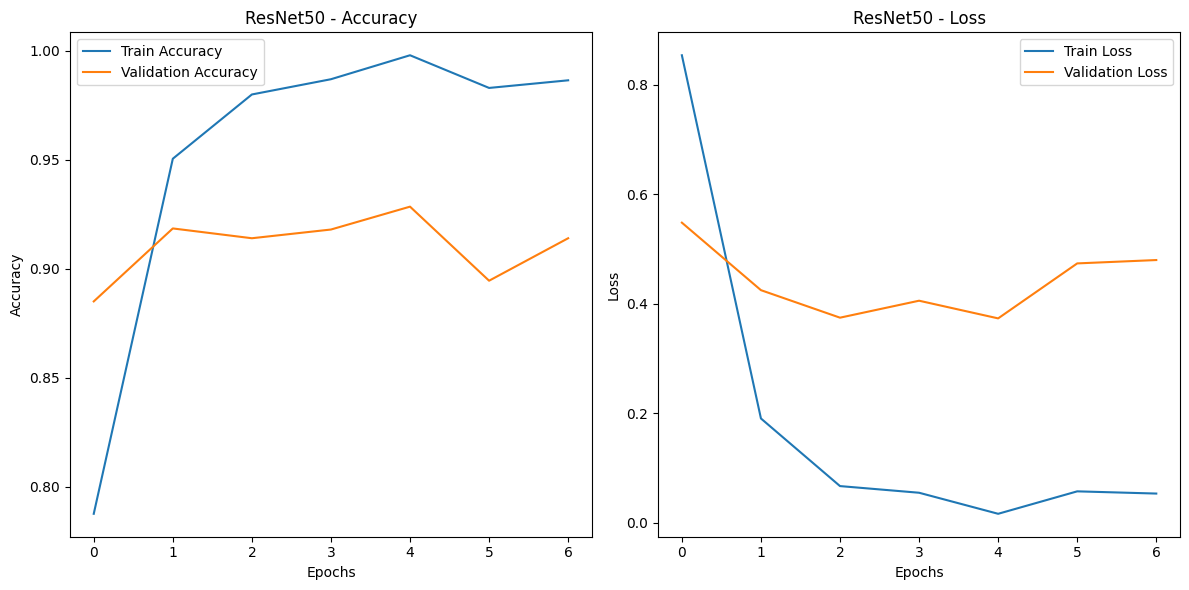

63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 685ms/step - accuracy: 0.9249 - loss: 0.4173

Training EfficientNetV2M...
214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5267 - loss: 2.1637
Epoch 1: val_accuracy improved from -inf to 0.90150, saving model to ./best_model_EfficientNetV2M.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 489s 4s/step - accuracy: 0.5292 - loss: 2.1527 - val_accuracy: 0.9015 - val_loss: 0.5183 - learning_rate: 1.0000e-04
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9055 - loss: 0.4086
Epoch 2: val_accuracy improved from 0.90150 to 0.93150, saving model to ./best_model_EfficientNetV2M.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9058 - loss: 0.4075 - val_accuracy: 0.9315 - val_loss: 0.3030 - learning_rate: 1.0000e-04
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9602 - loss: 0.1626
Epoch 3: val_accuracy did not improve from 0.93150
63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - 

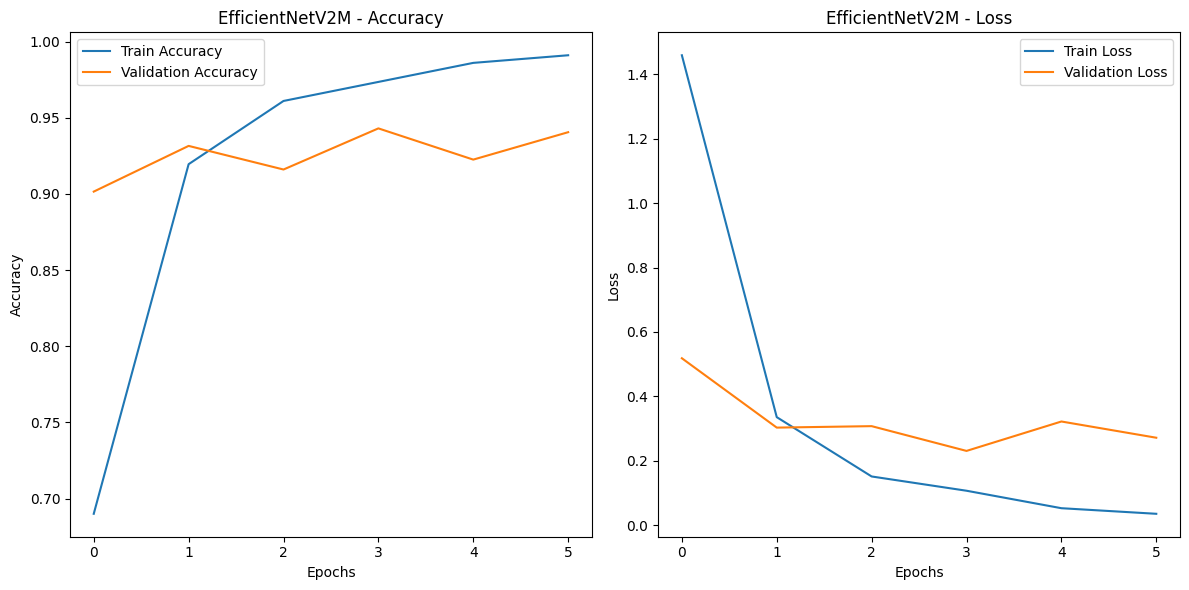

63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 698ms/step - accuracy: 0.9443 - loss: 0.2104

Model Comparison Results:
ResNet50: Validation Accuracy = 0.9285, Validation Loss = 0.3732
EfficientNetV2M: Validation Accuracy = 0.9430, Validation Loss = 0.2307


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50, EfficientNetV2M
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Model configurations
MODEL_CONFIGS = {
    "ResNet50": {
        "base_model": ResNet50,
        "input_shape": (224, 224, 3),
        "preprocess_input": tf.keras.applications.resnet50.preprocess_input
    },
    "EfficientNetV2M": {
        "base_model": EfficientNetV2M,
        "input_shape": (299, 299, 3),
        "preprocess_input": tf.keras.applications.efficientnet_v2.preprocess_input
    }
}

def build_model(model_name, num_classes):
    """Build and compile the CNN model."""
    config = MODEL_CONFIGS[model_name]
    base_model = config["base_model"](weights="imagenet", include_top=False, input_shape=config["input_shape"])

    # Make the last few layers trainable
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(2048, activation="relu"),
        Dropout(0.3),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

def train_model(model, model_name, train_generator, val_generator, epochs=8):
    """Train the model and save the best weights."""
    checkpoint = ModelCheckpoint(
        filepath=f"./best_model_{model_name}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode="max",
        verbose=1
    )

    early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.4, patience=2, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[checkpoint, early_stopping, reduce_lr],
        verbose=1
    )
    return history

def plot_training_history(history, model_name):
    """Plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'training_history_{model_name}.png')
    plt.show()

# Example usage
data_dir = "./processed_data"
train_csv = os.path.join(data_dir, "train.csv")
val_csv = os.path.join(data_dir, "val.csv")

# Parameters
batch_size = 32
selected_models = ["ResNet50", "EfficientNetV2M"]

def preprocess_image_data(csv_file, target_size, preprocess_input):
    """Preprocess data and create an ImageDataGenerator."""
    df = pd.read_csv(csv_file)
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    generator = datagen.flow_from_dataframe(
        dataframe=df.sample(2000, random_state=42),  # Sample 2000 images for faster training
        x_col="image_path",
        y_col="subCategory",
        target_size=target_size[:2],
        batch_size=batch_size,
        class_mode="categorical"
    )
    return generator

# Preprocess data
train_generators = {}
val_generators = {}
for model_name in selected_models:
    train_generators[model_name] = preprocess_image_data(train_csv, MODEL_CONFIGS[model_name]["input_shape"], MODEL_CONFIGS[model_name]["preprocess_input"])
    val_generators[model_name] = preprocess_image_data(val_csv, MODEL_CONFIGS[model_name]["input_shape"], MODEL_CONFIGS[model_name]["preprocess_input"])

# Train and evaluate models
results = {}
for model_name in selected_models:
    print(f"\nTraining {model_name}...")
    num_classes = len(train_generators[model_name].class_indices)  # 获取类别数量
    model = build_model(model_name, num_classes)  # 构建模型
    history = train_model(model, model_name, train_generators[model_name], val_generators[model_name])  # 训练模型

    # Save training history
    with open(f'history_{model_name}.pkl', 'wb') as f:
        pickle.dump(history.history, f)

    # Plot training history
    plot_training_history(history, model_name)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_generators[model_name], verbose=1)
    results[model_name] = {
        "Validation Accuracy": val_accuracy,
        "Validation Loss": val_loss
    }

# Compare results
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Validation Accuracy = {metrics['Validation Accuracy']:.4f}, Validation Loss = {metrics['Validation Loss']:.4f}")


In [ ]:
df = pd.read_csv(train_csv)
print(df.columns)


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'image_path', 'image_exists'],
      dtype='object')


Found 2000 validated image filenames belonging to 29 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 803ms/step - accuracy: 0.9332 - loss: 0.2531
Test Accuracy: 0.9385, Test Loss: 0.2329
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 946ms/step


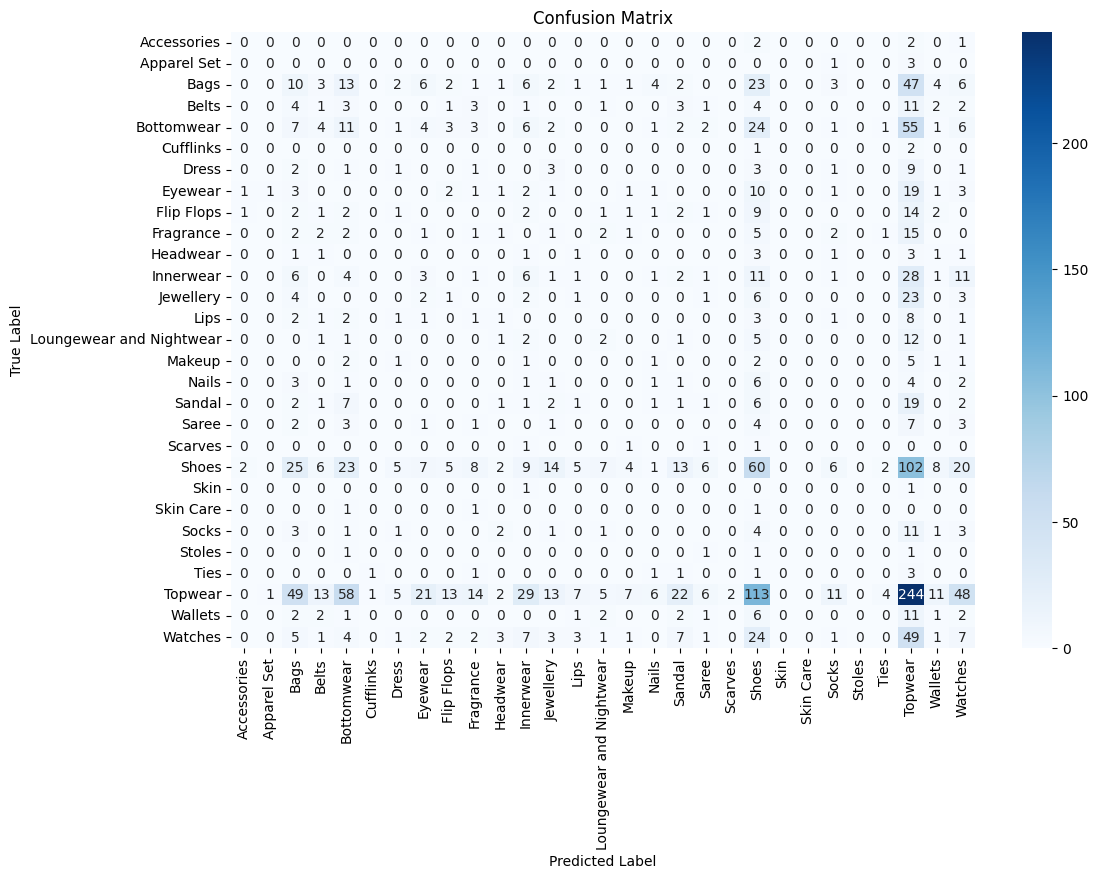

                          precision    recall  f1-score   support

             Accessories       0.00      0.00      0.00         5
             Apparel Set       0.00      0.00      0.00         4
                    Bags       0.07      0.07      0.07       138
                   Belts       0.03      0.03      0.03        37
              Bottomwear       0.08      0.08      0.08       134
               Cufflinks       0.00      0.00      0.00         3
                   Dress       0.05      0.05      0.05        22
                 Eyewear       0.00      0.00      0.00        48
              Flip Flops       0.00      0.00      0.00        40
               Fragrance       0.03      0.03      0.03        36
                Headwear       0.00      0.00      0.00        13
               Innerwear       0.08      0.08      0.08        78
               Jewellery       0.00      0.00      0.00        43
                    Lips       0.00      0.00      0.00        22
Loungewea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 加载测试数据
test_csv = os.path.join(data_dir, "test.csv")
test_generator = preprocess_image_data(test_csv, MODEL_CONFIGS["EfficientNetV2M"]["input_shape"],
                                       MODEL_CONFIGS["EfficientNetV2M"]["preprocess_input"])

# 加载最佳模型
best_model_path = "./best_model_EfficientNetV2M.keras"
best_model = tf.keras.models.load_model(best_model_path)

# 在测试集上评估
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# 混淆矩阵与分类报告
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 获取真实标签和预测值
test_labels = test_generator.classes
predictions = np.argmax(best_model.predict(test_generator), axis=1)

# 混淆矩阵
conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 分类报告
print(classification_report(test_labels, predictions, target_names=test_generator.class_indices.keys()))


Simple models testing

Overlap (id): 0
Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        10
           2       0.65      0.78      0.71       307
           3       0.50      0.64      0.56        81
           4       0.35      0.06      0.10       270
           5       1.00      0.10      0.18        10
           6       0.65      0.27      0.38        48
           7       0.27      0.98      0.42       108
           8       0.00      0.00      0.00        92
           9       0.61      0.67      0.64       102
          10       0.25      0.21      0.23        29
          11       0.61      0.88      0.72       181
          12       0.52      0.40      0.45       108
          13       0.36      0.48      0.41        52
          14       1.00      0.28      0.43        47
          15       0.45      0.68      0.54

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


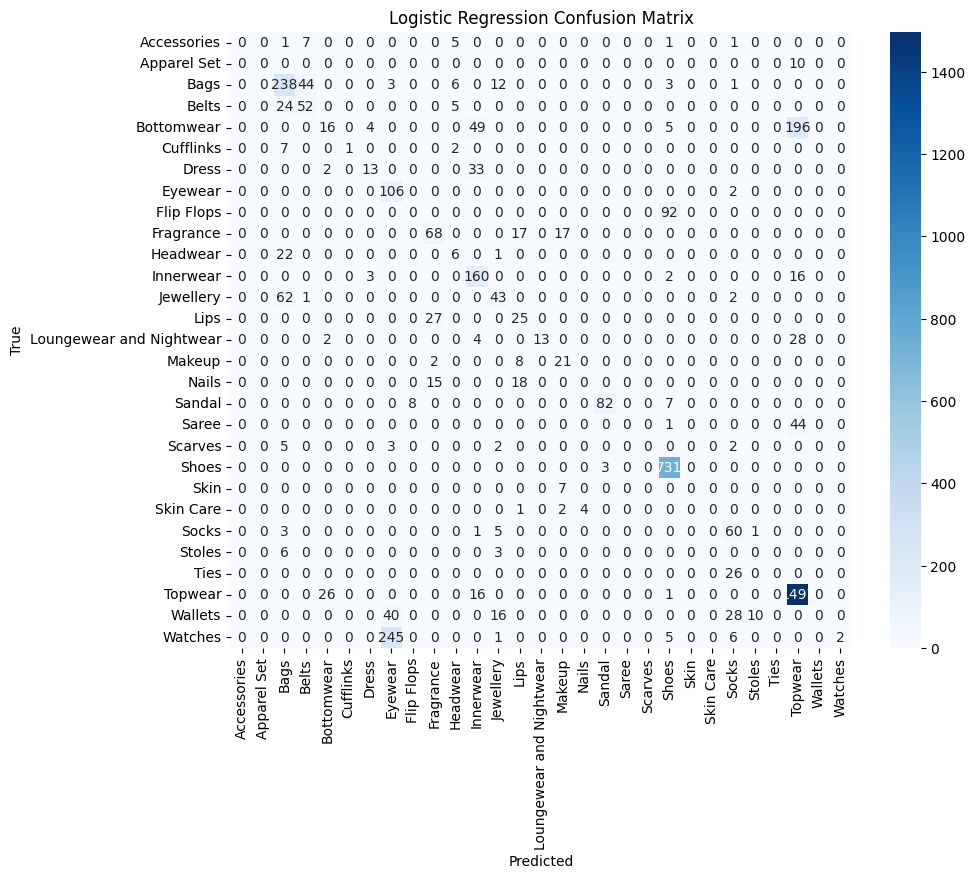

Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.00      0.00      0.00        10
           2       0.58      0.95      0.72       307
           3       0.79      0.69      0.74        81
           4       0.90      0.07      0.13       270
           5       1.00      0.20      0.33        10
           6       0.65      0.27      0.38        48
           7       0.00      0.00      0.00       108
           8       0.84      0.61      0.70        92
           9       0.54      0.67      0.59       102
          10       0.83      0.34      0.49        29
          11       0.66      0.88      0.75       181
          12       0.43      0.32      0.37       108
          13       0.00      0.00      0.00        52
          14       0.93      0.28      0.43        47
          15       0.44      1.00      0.61        31
          16       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


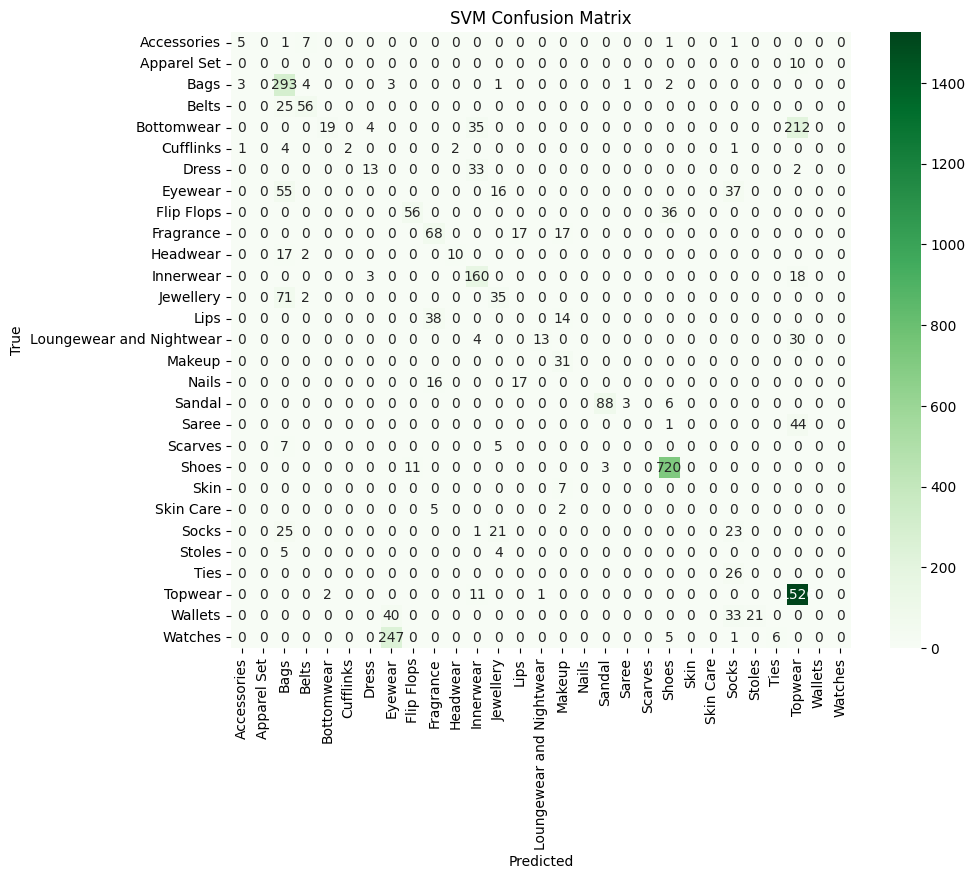

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 数据路径
data_dir = "./processed_data"
train_csv = f"{data_dir}/train.csv"
val_csv = f"{data_dir}/val.csv"
test_csv = f"{data_dir}/test.csv"

# 加载数据
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# **合并训练和验证集**
train_val_df = pd.concat([train_df, val_df], axis=0)

# **检查数据划分是否重叠**
def check_overlap(df1, df2, id_col='id'):
    overlap = set(df1[id_col]) & set(df2[id_col])
    print(f"Overlap ({id_col}): {len(overlap)}")
check_overlap(train_val_df, test_df, id_col='id')

# **提取特征和标签**
def preprocess_data(df, features, label):
    """提取特征并进行编码"""
    X = df[features].apply(LabelEncoder().fit_transform)
    y = LabelEncoder().fit_transform(df[label])
    return X, y

# 定义特征列和标签列
features = ['gender', 'masterCategory', 'articleType', 'baseColour', 'season', 'usage']
label = 'subCategory'

# 提取数据
X_train_val, y_train_val = preprocess_data(train_val_df, features, label)
X_test, y_test = preprocess_data(test_df, features, label)

# 数据标准化
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

# **逻辑回归模型**
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_val, y_train_val)

# 测试集评估
lr_predictions = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

# 混淆矩阵
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_df[label]),
            yticklabels=np.unique(test_df[label]))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# **SVM模型**
print("Training SVM...")
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_val, y_train_val)

# 测试集评估
svm_predictions = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# 混淆矩阵
cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(test_df[label]),
            yticklabels=np.unique(test_df[label]))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Data testing

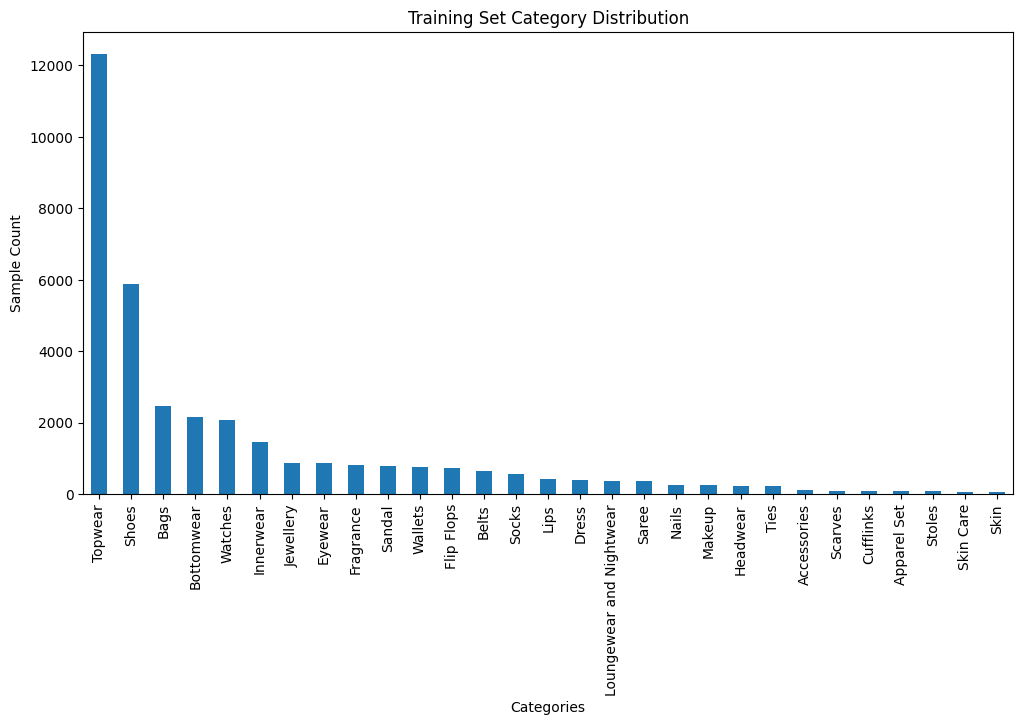

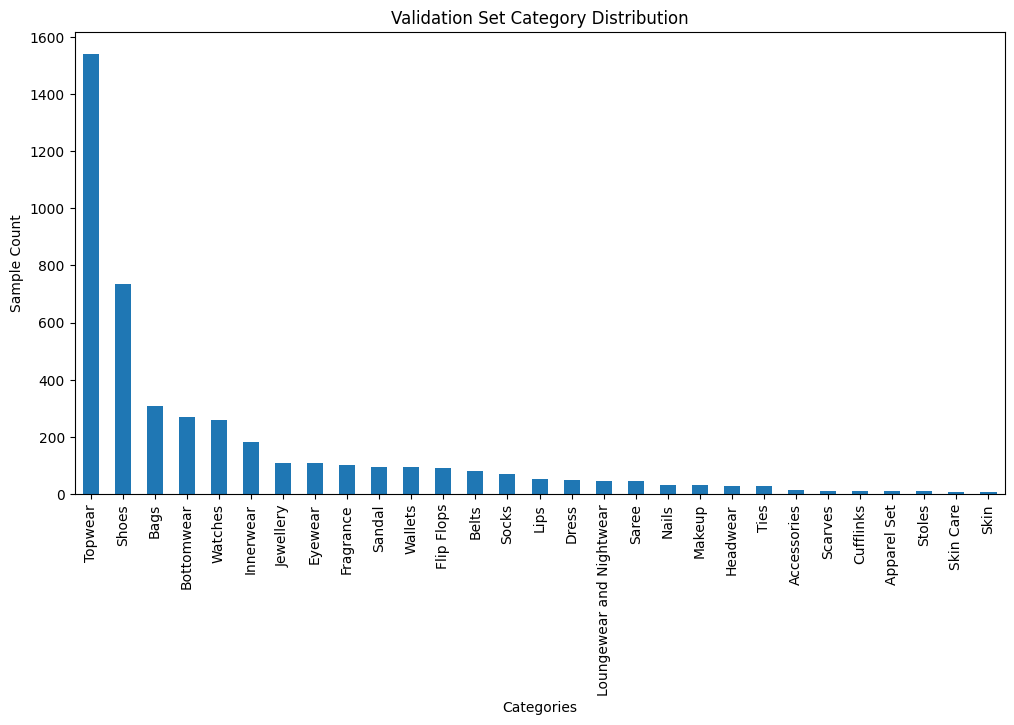

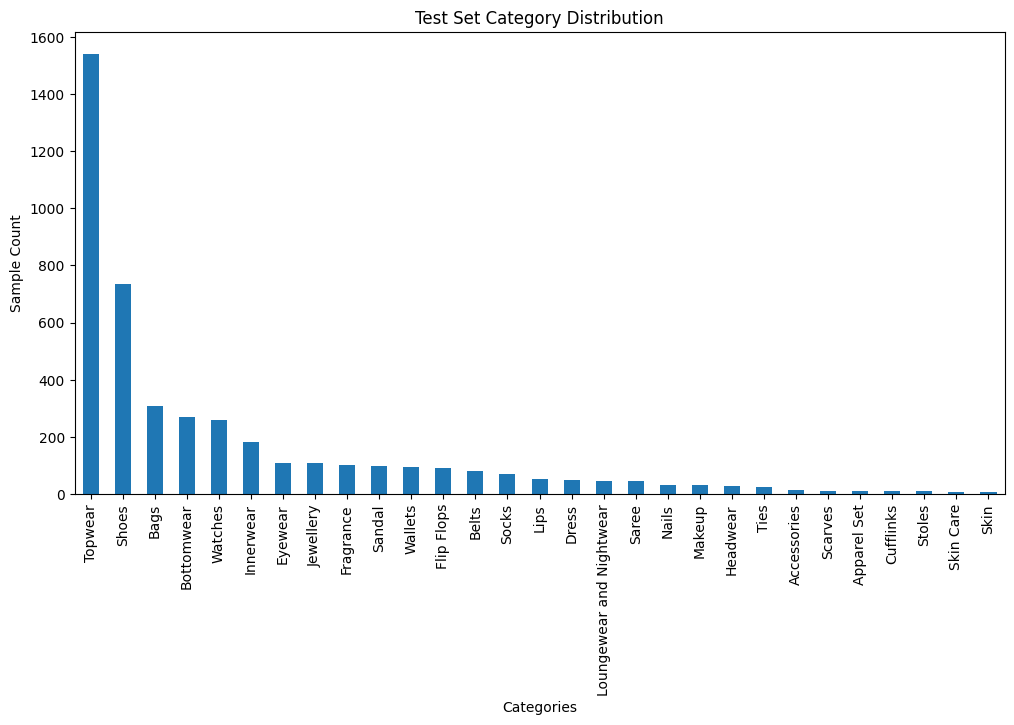

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
train_df = pd.read_csv("./processed_data/train.csv")
val_df = pd.read_csv("./processed_data/val.csv")
test_df = pd.read_csv("./processed_data/test.csv")

# 可视化类别分布
def plot_category_distribution(df, title):
    category_counts = df['subCategory'].value_counts()
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categories")
    plt.ylabel("Sample Count")
    plt.show()

plot_category_distribution(train_df, "Training Set Category Distribution")
plot_category_distribution(val_df, "Validation Set Category Distribution")
plot_category_distribution(test_df, "Test Set Category Distribution")


验证集和测试集也保留了训练集的类别分布特性，数据的划分方式没有问题

尝试数据增强

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

# 设置本地保存增强图片的目录
local_augmented_dir = "./augmented_images"
if os.path.exists(local_augmented_dir):
    shutil.rmtree(local_augmented_dir)  # 删除之前的目录，避免冲突
os.makedirs(local_augmented_dir)

# 数据增强器
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# 根据类别的数量决定增强图片的数量
for category, count in category_distribution.items():
    if count < target_threshold:
        num_to_augment = target_threshold - count
        category_dir = os.path.join(local_images_dir, category)  # 假设类别图片存在以类别名命名的目录
        augmented_category_dir = os.path.join(local_augmented_dir, category)
        os.makedirs(augmented_category_dir, exist_ok=True)

        for image_file in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_file)
            image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
            image = tf.keras.utils.img_to_array(image)
            image = image.reshape((1,) + image.shape)

            # 保存增强图片
            i = 0
            for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_category_dir, save_prefix="aug", save_format="jpeg"):
                i += 1
                if i >= num_to_augment:
                    break

print(f"增强后的图片已保存到本地目录：{local_augmented_dir}")


NameError: name 'category_distribution' is not defined

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 加载数据集路径
data_csv_path = "./drive/MyDrive/fashion-dataset/updated_styles.csv"  # 替换为你的实际路径
images_dir = "./drive/MyDrive/fashion-dataset/images"  # 图像目录
augmented_dir = "./augmented_images"  # 增强后的图像保存路径

# 创建增强后的图像目录
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# 加载数据集
data = pd.read_csv(data_csv_path)
data['image_path'] = data['id'].apply(lambda x: os.path.join(images_dir, f"{x}.jpg"))

# 提取类别分布
category_distribution = data['subCategory'].value_counts().to_dict()
print("类别分布：", category_distribution)

# 设置目标增强阈值
target_threshold = 500  # 每个类别的目标样本数，可根据需要调整

# 数据增强配置
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# 根据类别分布增强图片
for category, count in category_distribution.items():
    if count < target_threshold:
        num_to_augment = target_threshold - count
        print(f"为类别 {category} 增强 {num_to_augment} 张图片")

        # 筛选当前类别的图像路径
        category_images = data[data['subCategory'] == category]['image_path'].tolist()

        augmented_count = 0
        for image_path in category_images:
            if augmented_count >= num_to_augment:
                break
            try:
                # 加载图像并处理为数组
                image = tf.keras.utils.load_img(image_path, target_size=(224, 224))  # 替换为你的目标大小
                image = tf.keras.utils.img_to_array(image)
                image = image.reshape((1,) + image.shape)

                # 数据增强并保存
                for batch in datagen.flow(image, batch_size=1, save_to_dir=augmented_dir, save_prefix=category, save_format="jpeg"):
                    augmented_count += 1
                    if augmented_count >= num_to_augment:
                        break
            except Exception as e:
                print(f"跳过无效图像: {image_path}，错误: {e}")

print("数据增强完成，增强后的图像保存在本地目录:", augmented_dir)


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# 原始数据路径
original_train_csv = "./drive/MyDrive/fashion-dataset/processed_data/train.csv"
augmented_images_dir = "./augmented_images"

# 加载训练集数据
train_data = pd.read_csv(original_train_csv)

# 提取增强图像的信息
augmented_data = []
for filename in os.listdir(augmented_images_dir):
    if filename.endswith(".jpeg"):  # 过滤图像文件
        category = filename.split("_")[0]  # 文件名前缀为类别名称
        augmented_data.append({
            "image_path": os.path.join(augmented_images_dir, filename),
            "subCategory": category
        })

# 将增强数据转换为 DataFrame
augmented_df = pd.DataFrame(augmented_data)

# 合并增强数据到原始训练集
updated_train_data = pd.concat([train_data, augmented_df], ignore_index=True)

# 保存更新后的训练集
updated_train_csv = "./processed_data/updated_train.csv"
updated_train_data.to_csv(updated_train_csv, index=False)
print(f"增强后的训练集已保存到: {updated_train_csv}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载更新后的训练集
updated_train_csv = "./processed_data/updated_train.csv"
train_data = pd.read_csv(updated_train_csv)

# 检查类别分布
category_distribution = train_data['subCategory'].value_counts()

# 打印类别分布
print("训练集类别分布：")
print(category_distribution)

# 可视化类别分布
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar')
plt.title("Training Set Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 检查是否涵盖所有类别
original_categories = set(pd.read_csv("./drive/MyDrive/fashion-dataset/processed_data/train.csv")['subCategory'].unique())
current_categories = set(train_data['subCategory'].unique())

missing_categories = original_categories - current_categories
if len(missing_categories) == 0:
    print("所有类别均已涵盖！")
else:
    print(f"以下类别未出现在增强后的训练集中：{missing_categories}")


In [ ]:
import pandas as pd

# 读取训练集
train_csv_path = "./processed_data/train.csv"
train_data = pd.read_csv(train_csv_path)

# 设置最大样本数量
max_samples = 6000

# 对每个类别进行采样
balanced_train_data = train_data.groupby("subCategory", group_keys=False).apply(
    lambda x: x.sample(n=max_samples, random_state=42) if len(x) > max_samples else x
)

# 查看新的类别分布
print(balanced_train_data["subCategory"].value_counts())

# 保存新的训练集
balanced_train_data.to_csv("./processed_data/balanced_train.csv", index=False)


In [ ]:
pip install imbalanced-learn


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# 数据路径
DRIVE_DATA_DIR = '/content/drive/MyDrive/fashion-dataset'
STYLES_CSV = os.path.join(DRIVE_DATA_DIR, 'updated_styles.csv')
IMAGES_DIR = os.path.join(DRIVE_DATA_DIR, 'images')
LOCAL_OUTPUT_DIR = './processed_data'

# 创建本地输出目录
if not os.path.exists(LOCAL_OUTPUT_DIR):
    os.makedirs(LOCAL_OUTPUT_DIR)

# 加载 updated_styles.csv
print("Loading dataset...")
data = pd.read_csv(STYLES_CSV, on_bad_lines='skip')
data = data[['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']]

# 验证图像文件是否存在
print("Verifying image files...")
data['image_path'] = data['id'].apply(lambda x: os.path.join(IMAGES_DIR, f"{x}.jpg"))
data['image_exists'] = data['image_path'].apply(os.path.exists)

# 移除缺失图像的样本
print("Removing samples with missing images...")
data = data[data['image_exists']]

# 过滤掉样本数较少的类别
MIN_SAMPLES = 50
print(f"Filtering categories with fewer than {MIN_SAMPLES} samples...")
valid_subcategories = data['subCategory'].value_counts()
valid_subcategories = valid_subcategories[valid_subcategories >= MIN_SAMPLES].index
data = data[data['subCategory'].isin(valid_subcategories)]

# 检查剩余样本分布
print("Remaining samples by subCategory:")
print(data['subCategory'].value_counts())

# 动态调整划分策略，确保每个子集不为空
print("Splitting dataset into train, validation, and test sets...")
train_data_list = []
val_data_list = []
test_data_list = []

for subcategory, group in data.groupby('subCategory'):
    if len(group) >= 3:  # 确保至少能划分成训练、验证、测试集
        train, temp = train_test_split(group, test_size=0.2, random_state=42)
        val, test = train_test_split(temp, test_size=0.5, random_state=42)
        train_data_list.append(train)
        val_data_list.append(val)
        test_data_list.append(test)
    else:
        print(f"Skipping subCategory '{subcategory}' due to insufficient samples.")

# 合并结果
train_data = pd.concat(train_data_list).reset_index(drop=True)
val_data = pd.concat(val_data_list).reset_index(drop=True)
test_data = pd.concat(test_data_list).reset_index(drop=True)

# 保存处理后的数据到本地
print("Saving processed datasets locally...")
train_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'train.csv'), index=False)
val_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'val.csv'), index=False)
test_data.to_csv(os.path.join(LOCAL_OUTPUT_DIR, 'test.csv'), index=False)

# 打印样本分布
print(f"Number of samples in train set: {len(train_data)}")
print(f"Number of samples in validation set: {len(val_data)}")
print(f"Number of samples in test set: {len(test_data)}")
print("Final distribution in training set:")
print(train_data['subCategory'].value_counts())

print("Preprocessing completed. Processed data saved locally in:", LOCAL_OUTPUT_DIR)
